In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

<div class="alert-warning">
    
## Instructions  
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Before you start  

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment. 
  
- Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments. 

### Group work instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   
### Before submitting  

- **Run all cells** (▶▶ button) to ensure the notebook executes cleanly from top to bottom.

  - Execution counts must start at **1** and be sequential.
    
  - Notebooks with missing outputs or errors may lose marks.

- **Do not upload or push data files** used in this lab to GitHub or Gradescope. (A `.gitignore` is provided to prevent this.)  


### Submitting on Gradescope  

- Upload **only** your `.ipynb` file (with outputs shown) and any required output files. Do **not** submit extra files.
  
- If needed, refer to the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- If your notebook is too large to render, also upload a **Web PDF** or **HTML** version.  
  - You can create one using **File $\rightarrow$ Save and Export Notebook As**.  
  - If you get an error when creating a PDF, try running the following commands in your lab directory:  

    ```bash
    conda install -c conda-forge nbconvert-playwright
    jupyter nbconvert --to webpdf lab1.ipynb
    ```  

  - Ensure all outputs are visible in your PDF or HTML file; TAs cannot grade your work if outputs are missing.

</div>


_Note: Unlike previous assignments, this one is open-ended and project-style. Treat it as an opportunity to explore, experiment, and learn._

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import os
import string
import sys
from collections import deque

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append(os.path.join(os.path.abspath(".."), "code"))
from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier

DATA_DIR = os.path.join(os.path.abspath(".."), "data/")
%matplotlib inline

<!-- END QUESTION -->

## Introduction

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (10-14 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


<div class="alert alert-info">
    
**Your tasks:**

1. Review the available datasets and choose the one you find most interesting. It may help to read through the dataset documentation on Kaggle before deciding.
2. Once you've selected a dataset, take time to understand the problem it represents and the meaning of each feature. Use the Kaggle documentation to guide you.
3. Download the dataset and load it into a pandas DataFrame.
4. Write a few sentences summarizing your initial thoughts about the problem and the dataset.
   
</div>

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

In [3]:
client_df = pd.read_csv("clients_file/UCI_Credit_Card.csv")
client_df


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


The dataset focuses on Default of Credit Card Clients. I will use supervised machine learning to solve this classification problem, predicting the default payment based on various features. This project involves splitting the data, preprocessing it, and training several classification models to predict whether a credit card client will default (fail to pay their credit card bills) or not. The dataset is of moderate size. The number of features is rather small. I would consider this as a small dimensional problem. All features are numerically encoded. That said, some features such as sex and marriage seem more like categorical features

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.

</div>

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split (client_df, test_size = 0.3, random_state = 123)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA
<hr>
rubric={points:10}

<div class="alert alert-info">

**Your tasks:**

1. **Perform exploratory data analysis (EDA)**: Conduct an initial exploration of the training set to better understand its characteristics.

2. **Summarize and visualize the data**: Include at least **two summary statistics** and **two visualizations** that you find informative. For each, write **one sentence** explaining what insight it provides.

3. **Record your observations**: Summarize your **initial observations** about the dataset based on your EDA.

4. **Select evaluation metrics**: Choose one or more **appropriate metrics** for assessing model performance and briefly justify your choice.

</div>

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [5]:
train_df.shape

(21000, 25)

In [6]:
train_df.sort_index()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [7]:
client_summary = train_df.describe(include = "all")
client_summary

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


The first summary statistic is the average of credit limit. We can obtain it by using the code below or find the maximum price on the summary of the Credit Card Clients dataset above.

In [8]:
average_credit_limit = train_df['LIMIT_BAL'].mean()
average_credit_limit

#average_credit_limit = 167880.651429

np.float64(167880.65142857144)

The second summary statistic is the default rate where can provide information about the class imbalance. The default rate is around 0.22, indicating that the class is slightly imbalance.

In [9]:
default_rate = client_df["default.payment.next.month"].mean()
default_rate

np.float64(0.2212)

The first visualization presents histograms of different repayment statuses. From the plots, we observe that PAYMENT_STATUS = 1 (a one-month payment delay) has the highest frequency across all repayment statuses.

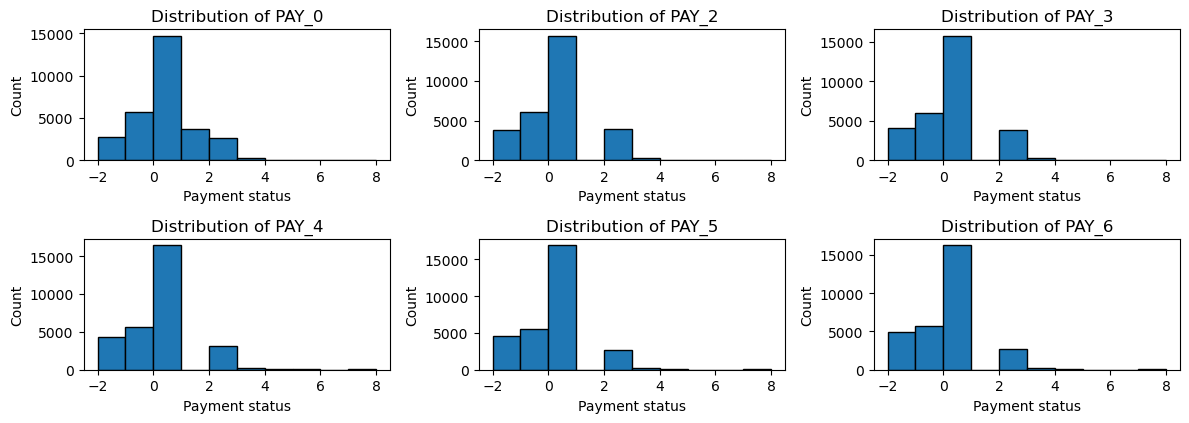

In [10]:
pay_cols = ["PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]  

plt.figure(figsize=(12, 6))

for i, col in enumerate(pay_cols, 1):
    plt.subplot(3,3, i)
    plt.hist(client_df[col], bins=10, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel("Payment status")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

The second visualization shows that the histgrams of different amount of previous payment. From the plots, we can observe that `PAY_AMT1`(Amount of previous payment in September, 2005) and `PAY_AMT3`(Amount of previous payment in July, 2005) have the largest amount of payment, ranging from 0 to 800,000. 

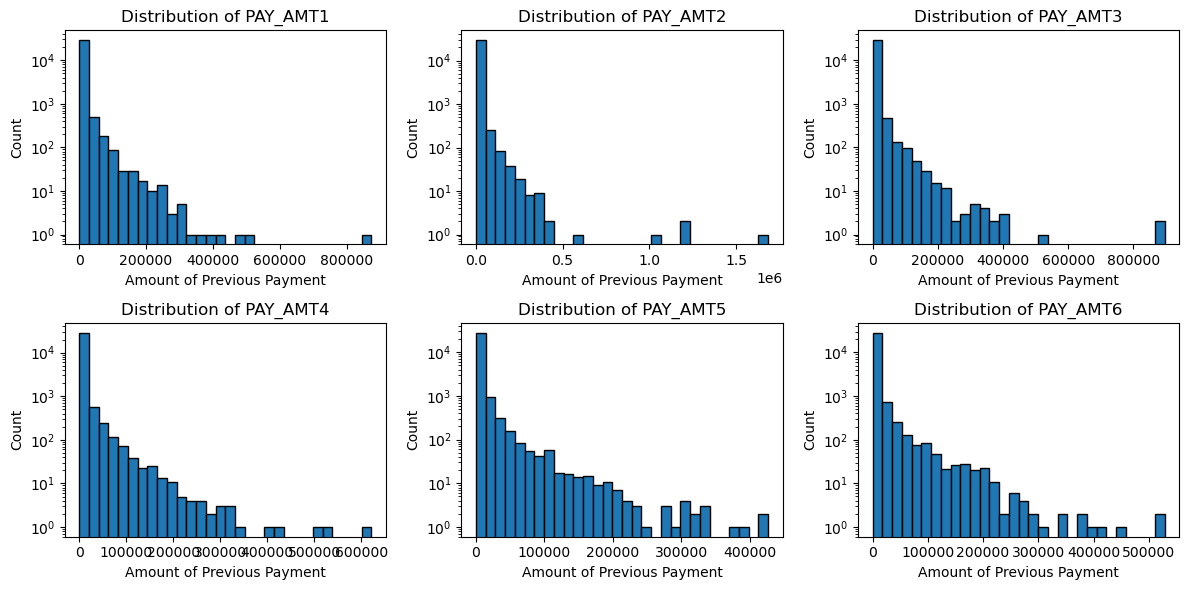

In [11]:
pay_amt_cols = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

plt.figure(figsize=(12, 6))

for i, col in enumerate(pay_amt_cols, 1):
    plt.subplot(2, 3, i)
    plt.hist(client_df[col], bins=30, edgecolor='black', log=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel("Amount of Previous Payment")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

**Initial observations**

From the exploratory data analysis (EDA), there are several patterns I observed:

Most clients make payments on time or have only a short delay (1 month) from the repayment status distributions.

The payment amount distributions are highly right-skewed. Also, the payment in September and July have the highest payment values (up to around 800,000).

The average bill amounts is approximately 167880 NT dollars with standard deviation around 130202 NT dollars, suggesting there is big variance between the clients. Some clients may have way higher credit limit than others. 

From the default ratio with around 0.22, we know that there is a slightly class imbalance. Due to this imbalance, using only accuracy may be misleading. Thus, we can use AP score and F1-score to evaluate the performance. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering
<hr>
rubric={points:1}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature engineering**: Create new features that are relevant to the problem and use this updated feature set in the following exercises. You may need to iterate between **feature engineering** and **preprocessing** to refine your features and improve model performance.
   
</div>

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

In [12]:
bill_cols = ["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]
pay_amt_cols = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]


In [13]:
# Create new average features: average bill amount and average payment amount
train_df_new = train_df.assign(
    avg_bill_amt=train_df[bill_cols].mean(axis=1),
    avg_pay_amt=train_df[pay_amt_cols].mean(axis=1)
)
test_df_new = test_df.assign(
    avg_bill_amt=test_df[bill_cols].mean(axis=1),
    avg_pay_amt=test_df[pay_amt_cols].mean(axis=1)
)


In [14]:
# Drop the original columns
train_df_finalized = train_df_new.drop(columns=bill_cols + pay_amt_cols)
test_df_finalized = test_df_new.drop(columns=bill_cols + pay_amt_cols)

In [15]:
train_df_finalized

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month,avg_bill_amt,avg_pay_amt
16395,16396,320000.0,2,1,2,36,0,0,0,0,0,0,0,19868.833333,3505.166667
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,0,0,0,88137.666667,47954.333333
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,-2,-2,0,-18.000000,0.000000
25755,25756,120000.0,2,2,1,30,0,0,0,0,0,0,0,88447.000000,3356.000000
1438,1439,50000.0,1,2,2,54,1,2,0,0,0,0,0,34180.166667,1100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,0,2,0,14478.166667,1441.000000
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,0,-1,0,2016.833333,1586.833333
28030,28031,50000.0,2,3,1,29,0,0,0,0,0,0,1,33267.500000,1198.000000
15725,15726,30000.0,2,2,2,21,0,0,0,0,0,0,0,27202.333333,1349.333333


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Identify feature types**: Determine the different types of features in your dataset (e.g., numerical, categorical, ordinal, text) and specify the transformations you would apply to each type.

2. **Define a column transformer (if needed)**: Implement a `ColumnTransformer` to apply the appropriate preprocessing steps to each feature type.
 
</div>

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [16]:
train_df_finalized.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default.payment.next.month', 'avg_bill_amt', 'avg_pay_amt'],
      dtype='object')

In [17]:
train_df_finalized['EDUCATION'].value_counts()


EDUCATION
2    9815
1    7433
3    3416
5     210
4      81
6      35
0      10
Name: count, dtype: int64

In [18]:
train_df_finalized['MARRIAGE'].value_counts()


MARRIAGE
2    11210
1     9527
3      229
0       34
Name: count, dtype: int64

In [19]:
train_df_finalized['SEX'].value_counts()


SEX
2    12616
1     8384
Name: count, dtype: int64

In [20]:
numeric_feats = ['AGE', 'LIMIT_BAL', 'avg_bill_amt','avg_pay_amt']  

binary_feats = ['SEX']

categorical_feats = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] 

ordinal_feats = ['EDUCATION', 'MARRIAGE']  

drop_feats = ['ID'] 

In [21]:
# transformer for numeric features
numeric_transformer = make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

# transformer for binary features
binary_transformer = "passthrough"

# transformer for ordinal features
education_level = ["0", "1", "2", "3", "4", "5", "6" ]
marriage_level = ["0", "1", "2", "3"]

ordinal_transformer = OrdinalEncoder(categories = [education_level, marriage_level], dtype= int) 

# transformer for categorical features
categorical_transformer = make_pipeline( 
    SimpleImputer(strategy = "most_frequent", fill_value = "missing"),
    OneHotEncoder(handle_unknown = "ignore", sparse_output = False),
)


In [22]:
#Create a column transformer
preprocessor = make_column_transformer(
   (numeric_transformer , numeric_feats),
   (binary_transformer, binary_feats),
   (ordinal_transformer, ordinal_feats),
   (categorical_transformer, categorical_feats),
   ("drop", drop_feats)
)



In [23]:
#fit and transform columntransformer on the training set
preprocessor.fit_transform(train_df_finalized)


array([[ 0.05418666,  1.16835512, -0.39579944, ...,  0.        ,
         0.        ,  0.        ],
       [-0.59710771,  2.09001707,  0.67990984, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.92257914, -0.06052747, -0.70915548, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.70565677, -0.90538425, -0.18467719, ...,  0.        ,
         0.        ,  0.        ],
       [-1.57404925, -1.05899458, -0.28024578, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05418666,  1.55238093, -0.59894605, ...,  0.        ,
         0.        ,  0.        ]], shape=(21000, 71))

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Establish a baseline**: Use one of `scikit-learn`’s baseline models (e.g., `DummyClassifier` or `DummyRegressor`, depending on your task) and report the results. This will serve as a reference point for evaluating the performance of your more advanced models.

</div>

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [24]:
X_train_finalized = train_df_finalized.drop(columns = ['default.payment.next.month'])
y_train_finalized = train_df_finalized['default.payment.next.month']

X_test_finalized = test_df_finalized.drop(columns = ['default.payment.next.month'])
y_test_finalized = test_df_finalized['default.payment.next.month']

In [25]:
dummy = DummyClassifier(strategy="most_frequent")
scores = cross_validate(dummy, X_train_finalized, y_train_finalized, cv= 5, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.005771,0.001992,0.776905,0.776726
1,0.003289,0.009167,0.776905,0.776726
2,0.003015,0.003251,0.776667,0.776786
3,0.005967,0.002656,0.776667,0.776786
4,0.004390,0.001346,0.776667,0.776786


From the cross-validation results, the test scores range from approximately 0.776 to 0.777. Some folds slightly outperform the training scores, while others slightly underperform. As a reference point, the model performance is poor if the score is less than training scores, approximately 0.7767. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models 
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Train a linear model**: Use a linear model as your first real attempt at solving the problem.

2. **Tune hyperparameters**: Perform hyperparameter tuning to explore different values of the model's complexity parameter. 

3. **Evaluate with cross-validation**: Report the cross-validation scores along with their standard deviation.

4. **Summarize findings**: Summarize your results, highlighting key observations from your experiments.

</div>

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [26]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [27]:
scores = cross_validate(pipe, X_train_finalized, y_train_finalized, cv = 5, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,3.136160,0.018159,0.815476,0.822560
1,0.313130,0.019022,0.819048,0.820893
2,0.307364,0.019486,0.820476,0.820417
3,0.322811,0.018733,0.824762,0.819881
4,0.305781,0.019369,0.816429,0.822024


In [28]:
scores_new_dict = {
    "C": 10.0 ** np.arange(-4, 6, 1),
    "mean_train_scores": list(),
    "mean_cv_scores": list(),
    "std_train_scores": list(),
    "std_cv_scores": list(),
}
for C in scores_new_dict["C"]:
    pipe  = make_pipeline(preprocessor,LogisticRegression(C=C, max_iter=500))
    scores_new = cross_validate(pipe, X_train_finalized, y_train_finalized, cv= 5, return_train_score=True)
    scores_new_dict["mean_train_scores"].append(scores_new["train_score"].mean())
    scores_new_dict["mean_cv_scores"].append(scores_new["test_score"].mean())
    scores_new_dict["std_train_scores"].append(scores_new["train_score"].std())
    scores_new_dict["std_cv_scores"].append(scores_new["test_score"].std())

results_df = pd.DataFrame(scores_new_dict)
results_df

,C,mean_train_scores,mean_cv_scores,std_train_scores,std_cv_scores
0,0.0001,0.776762,0.776762,0.000029,0.000117
1,0.0010,0.797964,0.798095,0.000895,0.002904
2,0.0100,0.815440,0.814810,0.000627,0.000992
3,0.1000,0.820333,0.819000,0.000986,0.003324
4,1.0000,0.821155,0.819238,0.000996,0.003290
5,10.0000,0.821452,0.819524,0.001049,0.003123
6,100.0000,0.821333,0.819524,0.001082,0.003344
7,1000.0000,0.821417,0.819524,0.001080,0.003292
8,10000.0000,0.821357,0.819524,0.001265,0.003292
9,100000.0000,0.821536,0.819524,0.001052,0.003573


From the cross validation scores of logistic regression, the validation scores of fold 0, fold 1 and fold 4 are slightly lower than their training scores. However, the logistic regression model performs very well on validation data (unseen), with both high training scores and validation scores and nearly no gaps between them (e.g. no overfiting or underfitting). 

For tuning parameters for logistic regression, C = 0.1 is the best hyperparameter because the mean of training scores and validation scores are both high and their standard deviations are the lowest among all other hyperparameters. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models
<hr>
rubric={points:12}

<div class="alert alert-info">
    
**Your tasks:**

1. **Experiment with additional models**: Train at least **three models** other than a linear model. Ensure that **at least one** of these models is a **tree-based ensemble model** (e.g., Random Forest, Gradient Boosting, or XGBoost).

2. **Compare and interpret results**: Summarize your findings in terms of **overfitting/underfitting** behavior and **fit/score times** for each model. Reflect on your results. Were you able to **outperform the linear model**?

</div>

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [29]:
from sklearn.neighbors import KNeighborsClassifier


pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123, class_weight='balanced'))

pipe_knn = make_pipeline(
    preprocessor,
    KNeighborsClassifier(),
)
pipe_rf = make_pipeline(
    preprocessor, 
    RandomForestClassifier(random_state=123, class_weight='balanced'),
)

classifiers = {
    "decision tree": pipe_dt,
    "knn": pipe_knn,
    "random forest": pipe_rf,
}

In [30]:
results = {}

In [31]:
from sklearn.model_selection import cross_validate
import numpy as np

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns a dictionary with mean ± std for each cross-validation metric.
    Example usage:
    mean_std_cross_val_scores(RandomForestClassifier(), X, y, cv=5, scoring='accuracy')
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)
    results = {k: f"{np.mean(v):.3f} ± {np.std(v):.3f}" for k, v in scores.items()}
    return results

In [32]:
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train_finalized, y_train_finalized, cv=5, return_train_score=True, 
    )
pd.DataFrame(results).T


,fit_time,score_time,test_score,train_score
decision tree,0.734 ± 0.085,0.031 ± 0.009,0.733 ± 0.007,0.999 ± 0.000
knn,0.064 ± 0.008,0.681 ± 0.230,0.800 ± 0.004,0.846 ± 0.002
random forest,3.467 ± 0.294,0.133 ± 0.036,0.812 ± 0.003,0.999 ± 0.000


The fit time of the random forest is the longest, while the score time is relatively low. There is a big gap between the test score and train score, but the two scores are both high, indicating that random forest is likely to be overfitting. This means that the tree-based model memorize the training data very well, but can not predict perfectly on the unseen data. 

The decision tree also has long fit time but shorter than the fit time of random forest and its score time is also low. The decision tree has more risk of overfitting than random forest because the gap between the train score and test score are larger than that of random forest. This indicates that decision tree can also memorize train data very well, but predict poorly on the unseen data. However, after comparing the validation scores with the scores of baseline, I notice that validation scores is less than the baseline scores. Therefore, decision tree is not an appropriate model to predict this data. 

KNN has very low fit time, but its score time is very high, indicating that it can fit the data very quickly, but it needs a lot of time to predict the new observations such as calculating the Euclidean distance. However, its performance is the best among the three models. It has less risk of overfitting and both scores are relatively high. 

Thus, there is no models outperform than logistic regression model as it has almost no risk of overfitting and its two scores are both relatively high. Noticeably, random forest is still valuable because of its greatest validation score and its almost perfect training score. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection 
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

1. **Perform feature selection**: Attempt to select relevant features using methods such as `RFECV` or forward selection.

2. **Evaluate the impact** Compare the model performance before and after feature selection. Do the results improve with feature selection?

3. **Summarize findings** Summarize your observations and decide whether to **keep feature selection** in your pipeline.  If it improves results, retain it for the next exercises; otherwise, you may choose to omit it.
</div>

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [33]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


rfecv = RFECV(
    estimator=RandomForestClassifier(random_state=123, class_weight='balanced'),
    step=1,
    cv=StratifiedKFold(5),
    scoring="f1", 
    n_jobs=-1
)


rfecv.fit(X_train_finalized, y_train_finalized)


,estimator,RandomForestC...dom_state=123)
,step,1
,min_features_to_select,1
,cv,StratifiedKFo...shuffle=False)
,scoring,'f1'
,verbose,0
,n_jobs,-1
,importance_getter,'auto'
,n_estimators,100
,criterion,'gini'
,max_depth,None


In [34]:
selected_features = X_train_finalized.columns[rfecv.support_]
print(selected_features.tolist())


['ID', 'LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'avg_bill_amt', 'avg_pay_amt']


In [35]:
X_train_selected = X_train_finalized[selected_features]
X_test_selected = X_test_finalized[selected_features]

In [36]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=123, class_weight='balanced'),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(class_weight='balanced',random_state=123),
}

In [37]:
results = []

for name, model in models.items():
    before = mean_std_cross_val_scores(model, X_train_finalized, y_train_finalized, cv=5, scoring="f1")
    after = mean_std_cross_val_scores(model, X_train_selected, y_train_finalized, cv=5, scoring="f1")
    
    results.append({
        "Model": name,
        "Fit Time (Before)": before["fit_time"],
        "Score Time (Before)": before["score_time"],
        "F1 Mean (Before)": before["test_score"],
        "Fit Time (After)": after["fit_time"],
        "Score Time (After)": after["score_time"],
        "F1 Mean (After)": after["test_score"]
    })

results_df = pd.DataFrame(results)
results_df

,Model,Fit Time (Before),Score Time (Before),F1 Mean (Before),Fit Time (After),Score Time (After),F1 Mean (After)
0,Decision Tree,0.246 ± 0.005,0.007 ± 0.001,0.386 ± 0.014,0.234 ± 0.010,0.006 ± 0.000,0.395 ± 0.015
1,KNN,0.021 ± 0.002,0.072 ± 0.007,0.204 ± 0.015,0.019 ± 0.001,0.066 ± 0.007,0.204 ± 0.015
2,Random Forest,4.458 ± 0.640,0.097 ± 0.005,0.462 ± 0.018,4.261 ± 0.165,0.100 ± 0.014,0.463 ± 0.015


I will not include feature selection in my final pipeline because the mean F1 scores across all folds remained exactly the same before and after applying feature selection for all three models. Thus, feature selection may not improve performance of the model.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Optimize hyperparameters**: Attempt to optimize hyperparameters for the models you have tried so far. In at least **one case**, tune **multiple hyperparameters** for a single model.

2. **Use suitable optimization methods**: You may use any of the following approaches for hyperparameter optimization:
   - [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)  
   - [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)  
   - [Bayesian optimization with scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

3. **Summarize your results**: Report and compare the optimized results across models. Discuss whether hyperparameter optimization led to performance improvements.

</div>

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [38]:
param_grid = {
    "decisiontreeclassifier__max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
}

dt_search = GridSearchCV(
    pipe_dt,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

dt_search.fit( X_train_finalized, y_train_finalized)

print("Best parameters:", dt_search.best_params_)
print("Best CV score (mean F1):", dt_search.best_score_)


Best parameters: {'decisiontreeclassifier__max_depth': 2}
Best CV score (mean F1): 0.8052857142857143


In [39]:
param_grid = {
    "kneighborsclassifier__n_neighbors": [3, 5, 7, 9, 11],
}

knn_search = GridSearchCV(
    pipe_knn,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1
)

knn_search.fit(X_train_finalized, y_train_finalized)
print("Best parameters:", knn_search.best_params_)
print("Best CV score (mean F1):", knn_search.best_score_)

Best parameters: {'kneighborsclassifier__n_neighbors': 11}
Best CV score (mean F1): 0.8102380952380953


In [40]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "randomforestclassifier__n_estimators": randint(30, 100),
    "randomforestclassifier__max_depth": randint(5, 20),
}

rf_search = RandomizedSearchCV(
    pipe_rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=123,
    n_jobs=-1
)

rf_search.fit(X_train_finalized, y_train_finalized)
print("Best parameters:", rf_search.best_params_)
print("Best CV score (mean F1):", rf_search.best_score_)

Best parameters: {'randomforestclassifier__max_depth': 19, 'randomforestclassifier__n_estimators': 55}
Best CV score (mean F1): 0.809952380952381


For decision tree, the best hyperparameter is max_depth = 2. The validation score with the best hyperparameter is approximately 0.805 and its improve the performance of decision tree significantly from 0.733 to 0.805. Also, it reduce the risk of overfitting because the gap between the validation score and training score is smaller. After tunning hyperparameter, the validation score is greater than the baseline score (~0.777).

For knn, the best hyperparameter is n_neighbors = 11. The validation score with the best hyperparameter is around 0.81. The original mean of validation score is around 0.80, so there is a slightly improvement on predicting unseen data. 

For random forest, the best hyperparameters are n_estimators = 62 and max_depth = 14. The validation score with the best hyperparameters is around 0.82 that also improve the performance slightly because the original mean of validation scores is around 0.812. Also, it reduces the risk of overfitting. The training score and validation score are still the highest among the three models. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances
<hr>
rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Interpret model feature importance**: Use one of the interpretation methods discussed in class (e.g., `shap`), or another suitable method of your choice, to examine the most important features of one of your **non-linear models**.

2. **Summarize insights**: Summarize your observations about which features contribute most to the model's predictions and how they influence the outcomes.

   
</div>

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [41]:
pipe_rf.fit(X_train_finalized, y_train_finalized)


,steps,"[('columntransformer', ...), ('randomforestclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('pipeline-1', ...), ('passthrough', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
from sklearn.inspection import permutation_importance
def get_permutation_importance(model):
    result = permutation_importance(model,  X_train_finalized,  y_train_finalized, n_repeats=10, random_state=123)
    perm_sorted_idx = result.importances_mean.argsort()
    plt.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X_train_finalized.columns[perm_sorted_idx],
    )
    plt.xlabel('Permutation feature importance')
    plt.show()

/var/folders/l7/y0d6zf4d0nx7223jkck5p7hr0000gn/T/ipykernel_92438/3410453994.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


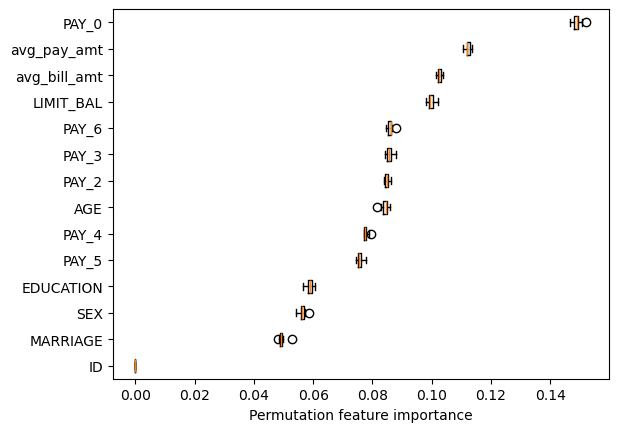

In [43]:
get_permutation_importance(pipe_rf)


From the permutation importance plot, `PAY_0` has the greatest feature importance with the score (~0.14), suggesting that it is the strongest predictor of default. However, the other repayment statuses (`PAY_2`, `PAY_3`, `PAY_4`, `PAY_5`, `PAY_6`) are significantly lower (around 0.77-0.08). 


The second important feature is `avg_pay_amt`(~0.11), followed by `LIMIT_BAL` (~0.10) and `avg_bill_amt` (~0.09). These demonstrate that credit limit, average payment and average bill amount play key roles in predicting whether the clients will fail to pay the credit card bills. The least important features are `EDUCATION`, `SEX`, and `ID`.  

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set
<hr>

rubric={points:10}

<div class="alert alert-info">
    
**Your tasks:**

1. **Evaluate on the test set**: Apply your best-performing model to the test data and report the test scores.

2. **Compare and reflect**: Compare the **test scores** with the **validation scores** from previous experiments. Discuss the consistency between them. How much do you **trust your results**? Reflect on whether you might have encountered **optimization bias**.

3. **Explain individual predictions**: Select one or two examples from your test predictions and use an interpretation method (e.g., **SHAP force plots**) to explain these individual predictions.
</div>

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [44]:
from sklearn.metrics import f1_score

pipe_dt = make_pipeline(
    preprocessor,
    DecisionTreeClassifier(max_depth=2)
)

pipe_knn = make_pipeline(
    preprocessor,
    KNeighborsClassifier(n_neighbors=11) 
)

pipe_rf = make_pipeline(
    preprocessor, 
    RandomForestClassifier(random_state=123, class_weight='balanced', max_depth=14, n_estimators=62)
)

classifiers = {
    "Decision Tree": pipe_dt,
    "KNN": pipe_knn,
    "Random Forest": pipe_rf
}

results = []

for name, model in classifiers.items():
    model.fit(X_train_finalized, y_train_finalized)
    y_pred = model.predict(X_test_finalized)
    test_f1 = f1_score(y_test_finalized, y_pred, average='weighted')  
    test_acc = model.score(X_test_finalized, y_test_finalized) 
    
    results.append({
        "Model": name,
        "Test F1-score": test_f1,
        "Test Accuracy": test_acc
    })

df_results = pd.DataFrame(results)
df_results

,Model,Test F1-score,Test Accuracy
0,Decision Tree,0.781300,0.814556
1,KNN,0.791739,0.812444
2,Random Forest,0.796623,0.798889


The Random Forest model has a good accuracy (~0.80), which is close to the validation score, suggesting that the model generalizes well. Also, it has high F1-score (~0.80) indicates that the model can correctly identify the minority class due to class imbalance.
Other than that, tuning the parameter and giving more weight on important features improve the F1 score significantly from around 0.462 to 0.797. Therefore, the random forest is trustworthy.

In [47]:
rf_tuned = RandomForestClassifier(
    random_state=123,
    max_depth=rf_search.best_params_["randomforestclassifier__max_depth"],
    n_estimators=rf_search.best_params_["randomforestclassifier__n_estimators"],
)

rf_tuned.fit(X_train_finalized, y_train_finalized)

,n_estimators,55
,criterion,'gini'
,max_depth,19
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
import shap

explainer = shap.Explainer(rf_tuned)

In [66]:
rf_shap_values = explainer(X_test_finalized)

In [67]:
rf_shap_values.shape

(9000, 14, 2)

In [68]:
shap.initjs()


In [69]:
ex1_idx = 10
ex2_idx = 68
class_idx = 1

In [70]:
X_test_finalized.iloc[ex1_idx]


ID                121.000000
LIMIT_BAL       50000.000000
SEX                 1.000000
EDUCATION           3.000000
MARRIAGE            2.000000
AGE                37.000000
PAY_0               2.000000
PAY_2               2.000000
PAY_3               2.000000
PAY_4               3.000000
PAY_5               2.000000
PAY_6               2.000000
avg_bill_amt    48374.166667
avg_pay_amt      1705.833333
Name: 120, dtype: float64

In [71]:
y_test_finalized.iloc[ex1_idx]


np.int64(1)

In [72]:
model.predict(X_test_finalized)[ex1_idx]


np.int64(1)

In [73]:
model.predict_proba(X_test_finalized)[ex1_idx]


array([0.25796244, 0.74203756])

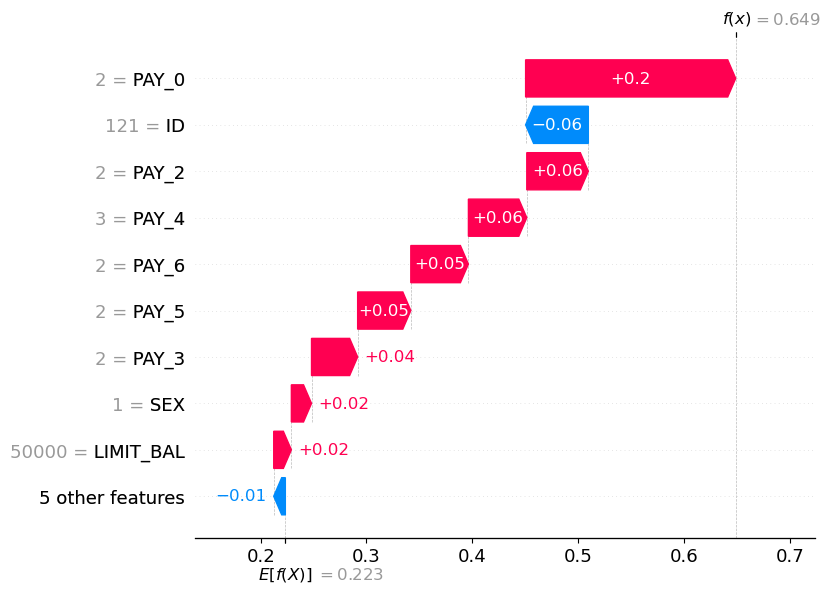

In [78]:
expl = rf_shap_values[ex1_idx][:, class_idx]
shap.plots.waterfall(expl)

For the first example, index = 10 (target =1). The model predicts the observation correctly, and the model is quite confident about the prediction with probability prediction, 0.7. 

— `PAY_0` has the largest positive SHAP value, meaning it pushes this specific prediction upwards the most compared with the average model prediction. 

— The other `PAY_*` features contribute positively, further pushing the prediction output higher.

— In contrast, `ID` have negative SHAP values, meaning they push the prediction lower.

— The remaining features seem not to influence the prediction much.

In [79]:
X_test_finalized.iloc[ex2_idx]

ID              25141.000000
LIMIT_BAL       90000.000000
SEX                 1.000000
EDUCATION           1.000000
MARRIAGE            1.000000
AGE                61.000000
PAY_0               0.000000
PAY_2               0.000000
PAY_3               0.000000
PAY_4               0.000000
PAY_5               0.000000
PAY_6               0.000000
avg_bill_amt    44709.500000
avg_pay_amt      1549.166667
Name: 25140, dtype: float64

In [80]:
y_test_finalized.iloc[ex2_idx]


np.int64(0)

In [81]:
model.predict(X_test_finalized)[ex2_idx]


np.int64(0)

In [82]:
model.predict_proba(X_test_finalized)[ex2_idx]


array([0.74935867, 0.25064133])

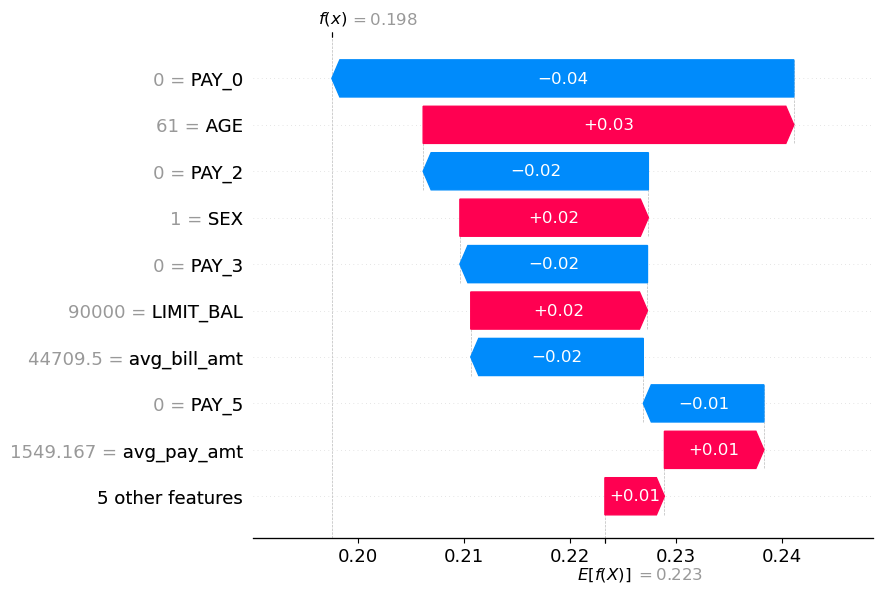

In [84]:
shap.plots.waterfall(rf_shap_values[ex2_idx, :, class_idx])


For the second example with index= 68 (target = 0), the random forest model also perdict correctly and is quite confident about the prediction as the probability prediciton is around 0.75. `PAY_0` has the biggest impact on the predictions, same as the first example. Surprisingly, `AGE` becomes the third important feature, while in the first example, it belongs to the least feature importance. Also, `ID` becomes the least feature importance while, in the first example, it is one of the most important features. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results
<hr>
rubric={points:12}

Imagine you are preparing to present the summary of your results to your boss and co-workers.

<div class="alert alert-info">
    
**Your tasks:**

1. **Summarize key results**: Create a clear and concise table highlighting your most important results (e.g., models compared, validation/test scores, key observations).

2. **Write concluding remarks**: Summarize your main takeaways from the project, including what worked well and what did not.

3. **Propose future improvements**: Discuss ideas or approaches you did not try but that could potentially improve **performance** or **interpretability**.

4. **Report final results**: Report your **final test score** and the **metric** you used.

</div>


<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [85]:
# Create a dictionary of your results
results = {
    "Model": ["Decision Tree", "KNN", "Random Forest"],
    "Validation scores with best hyperparameter": [0.733, 0.800, 0.812],
    "Validation scores with best hyperparameter": [0.805, 0.810, 0.820],
    "Test scores (accuracy) with best hyperparameter": [0.815, 0.812, 0.800],
    "Test scores (F1-score) with best hyperparameter": [0.781, 0.792, 0.7966],

}

df = pd.DataFrame(results)

df

,Model,Validation scores with best hyperparameter,Test scores (accuracy) with best hyperparameter,Test scores (F1-score) with best hyperparameter
0,Decision Tree,0.805,0.815,0.7810
1,KNN,0.810,0.812,0.7920
2,Random Forest,0.820,0.800,0.7966


**Observations**

After using the best hyperparameter and balancing the class weight, the F1 scores of all three non-linear models improve a lot and F1 score for all of the models can up to 0.78-0.79. Therefore, we can trust the three models. The three models all perform well on the test data and Decision Tree and KNN even have better performance on the test data. 

**Takeaway**

I improve the F1-scores for all three models by using tuning the hyperparameter and balancing the class weight. I also use feature engineering to create new features and remove some columns from the same categories like average repayment status. However, I think I could find a better method to do the feature selection as the F1-score did not increase the accuracy and scores at all. 

**Expectation**

In the future, I will try other models like XGBoost, to avoid overfitting because there are still a big gap between the train score and validation score for all three non-linear models. 

**Test score and metrics**

The final test score on Random Forest is 0.800 and F1-score 0.7966. 

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway
<hr>
rubric={points:2}

<div class="alert alert-info">
    
**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

</div>

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

I think my biggest takeway is to deal with the class imbalance and analyzing the performance on the validation scores by finding if there is any risk of overfitting or underfitting. Also, it gives me idea of comparing different models on the validation scores and find the suitable model on the test data. Furthermore, this project improve my technical skills in data analytics and machine learning. 

<!-- END QUESTION -->

<br><br>

Before submitting your assignment, please ensure you have followed all the steps in the **Instructions** section at the top.  

### Submission checklist  

- [ ] Restart the kernel and run all cells (▶▶ button)
- [ ] Make sure to push the most up to date version of your homework assignment to your GitHub repository so that we can use it for grading if there are any problems with your submission on Gradescope. 
- [ ] The `.ipynb` file runs without errors and shows all outputs.  
- [ ] Only the `.ipynb` file and required output files are uploaded (no extra files).  
- [ ] If the `.ipynb` file is too large to render on Gradescope, upload a Web PDF and/or HTML version as well.


This was a tricky one but you did it 👏👏!  

![](img/eva-well-done.png)